<a href="https://colab.research.google.com/github/osaaa27/Kerja-Praktek/blob/main/sentimen_pelaku_ekonomi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalasi pustaka yang diperlukan untuk analisis sentimen, visualisasi, dan pemrosesan data
!pip install pandas
!pip install matplotlib
!pip install wordcloud
!pip install transformers
!pip install torch

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline
import torch
import warnings

# Mengabaikan peringatan agar output lebih bersih
warnings.filterwarnings('ignore')

In [4]:
# Daftar nama file CSV yang akan dianalisis
files = [
    "/content/all_platforms_burayot_clean.csv",
    "/content/chocodot_cleaned gabungan.csv",
    "/content/cleaned_baso_aci_seluruh.csv",
    "/content/dodol_all_platforms_clean.csv",
    "/content/dorokdok_all platforms_clean.csv",
    "/content/kulit_all_platforms_cleaned.csv"
]

# Kamus (dictionary) untuk menyimpan setiap DataFrame
dfs = {}

print("Memuat dataset...")
# Loop untuk membaca setiap file CSV dan menyimpannya dalam kamus dfs
for file in files:
    try:
        # Membuat nama kunci yang lebih pendek untuk setiap dataframe
        key_name = file.split('_')[0]
        dfs[key_name] = pd.read_csv(file)
        print(f"-> Berhasil memuat {file} sebagai '{key_name}'")
    except Exception as e:
        print(f"-> Gagal memuat {file}. Error: {e}")

Memuat dataset...
-> Berhasil memuat /content/all_platforms_burayot_clean.csv sebagai '/content/all'
-> Berhasil memuat /content/chocodot_cleaned gabungan.csv sebagai '/content/chocodot'
-> Berhasil memuat /content/cleaned_baso_aci_seluruh.csv sebagai '/content/cleaned'
-> Berhasil memuat /content/dodol_all_platforms_clean.csv sebagai '/content/dodol'
-> Berhasil memuat /content/dorokdok_all platforms_clean.csv sebagai '/content/dorokdok'
-> Berhasil memuat /content/kulit_all_platforms_cleaned.csv sebagai '/content/kulit'


In [5]:
# Loop melalui setiap DataFrame dalam kamus untuk menampilkan info dan head
for name, df in dfs.items():
    print(f"\n--- Informasi untuk Dataset: {name} ---")
    print("Nama Kolom:")
    print(df.columns.tolist())
    print("\n5 Baris Pertama:")
    print(df.head())
    print("-" * (len(name) + 30))


--- Informasi untuk Dataset: /content/all ---
Nama Kolom:
['x1i10hfl href', 'xpdipgo src', '_ap3a', 'x1i10hfl href 3', 'x1ejq31n', 'x1lliihq', 'x1lliihq 2', 'x1lliihq 6', 'source', 'x193iq5w', 'xdj266r', 'xz74otr src 2', 'x1i10hfl 2', 'x1i10hfl href 5', 'yt-simple-endpoint href', 'style-scope', 'yt-simple-endpoint', 'yt-simple-endpoint href 2', 'yt-core-attributed-string', 'css-1jxf684', 'css-175oi2r href', 'css-9pa8cd src', 'css-175oi2r href 2', 'css-1jxf684 2', 'css-1jxf684 3', 'css-146c3p1', 'css-1jxf684 4', 'css-146c3p1 href', 'css-1jxf684 5', 'css-175oi2r href 4', 'css-1jxf684 8', 'css-1jxf684 12', 'css-9pu1vy-StyledUserLinkAvatar href', 'css-11j0z2t-ImgAvatar src', 'css-1uxwbtk-SpanUserNameText', 'css-z35s28-PCommentText', 'css-ckdg7w-SpanCreatedTime', 'css-9pu1vy-StyledUserLinkAvatar href 2']

5 Baris Pertama:
                               x1i10hfl href  \
0       https://www.instagram.com/rikibelen/   
1    https://www.instagram.com/kangdadanaza/   
2      https://www.instagr

In [10]:
# Impor pustaka yang diperlukan
from transformers import pipeline
import warnings

# Mengabaikan peringatan agar output lebih bersih
warnings.filterwarnings('ignore')

# Memuat pipeline untuk analisis sentimen dengan model yang telah diperbaiki
# Model: 'w11wo/indonesian-roberta-base-sentiment-classifier'
print("Menyiapkan model analisis sentimen...")
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="w11wo/indonesian-roberta-base-sentiment-classifier",
    tokenizer="w11wo/indonesian-roberta-base-sentiment-classifier"
)
print("Model siap digunakan! ✅")


# Fungsi untuk menentukan sentimen berdasarkan skor tertinggi
def get_sentiment(text):
    # Pastikan input adalah string dan tidak kosong
    if not isinstance(text, str) or not text.strip():
        return "neutral"  # Default ke netral jika teks kosong
    try:
        # Analisis teks menggunakan pipeline
        result = sentiment_analyzer(text)
        # Label dari model ini adalah ['positive', 'neutral', 'negative']
        return result[0]['label']
    except Exception:
        return "neutral" # Default ke netral jika terjadi error

# Fungsi untuk membuat word cloud
def generate_wordcloud(sentiment, df, text_column):
    # Gabungkan semua teks untuk sentimen tertentu
    text = ' '.join(df[df['sentiment'] == sentiment][text_column].dropna())
    if text:
        # Buat objek WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        # Tampilkan word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud untuk Sentimen {sentiment.capitalize()}', fontsize=16)
        plt.axis('off')
        plt.show()
    else:
        print(f"Tidak ada teks untuk menghasilkan word cloud sentimen {sentiment}.")

Menyiapkan model analisis sentimen...


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


Model siap digunakan! ✅


In [12]:
# Berdasarkan inspeksi, sepertinya kolom 'comment' berisi teks.
comment_column_chocodot = 'comment'

# Salin dataframe agar data asli tidak berubah
df_chocodot = dfs['/content/chocodot'].copy()
# Hapus baris yang tidak memiliki komentar
df_chocodot.dropna(subset=[comment_column_chocodot], inplace=True)
# Ubah tipe data kolom komentar menjadi string
df_chocodot['text'] = df_chocodot[comment_column_chocodot].astype(str)

print(f"Jumlah komentar yang akan dianalisis untuk Chocodot: {len(df_chocodot)}")

Jumlah komentar yang akan dianalisis untuk Chocodot: 1450


In [21]:
# Impor pustaka yang diperlukan
from transformers import pipeline
import warnings

# Mengabaikan peringatan agar output lebih bersih
warnings.filterwarnings('ignore')

# Memuat pipeline untuk analisis sentimen dengan model yang telah diperbaiki
# Model: 'w11wo/indonesian-roberta-base-sentiment-classifier'
print("Menyiapkan model analisis sentimen...")
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="w11wo/indonesian-roberta-base-sentiment-classifier",
    tokenizer="w11wo/indonesian-roberta-base-sentiment-classifier"
)
print("Model siap digunakan! ✅")


# --- Fungsi di bawah ini tidak perlu diubah ---

# Fungsi untuk menentukan sentimen berdasarkan skor tertinggi
def get_sentiment(text):
    # Pastikan input adalah string dan tidak kosong
    if not isinstance(text, str) or not text.strip():
        return "neutral"  # Default ke netral jika teks kosong
    try:
        # Analisis teks menggunakan pipeline
        result = sentiment_analyzer(text)
        # Label dari model ini adalah ['positive', 'neutral', 'negative']
        return result[0]['label']
    except Exception:
        return "neutral" # Default ke netral jika terjadi error

# Fungsi untuk membuat word cloud
def generate_wordcloud(sentiment, df, text_column):
    # Gabungkan semua teks untuk sentimen tertentu
    text = ' '.join(df[df['sentiment'] == sentiment][text_column].dropna())
    if text:
        # Buat objek WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        # Tampilkan word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud untuk Sentimen {sentiment.capitalize()}', fontsize=16)
        plt.axis('off')
        plt.show()
    else:
        print(f"Tidak ada teks untuk menghasilkan word cloud sentimen {sentiment}.")

Menyiapkan model analisis sentimen...


Device set to use cpu


Model siap digunakan! ✅


In [22]:
print("Memulai analisis sentimen untuk Chocodot...")
df_chocodot['sentiment'] = df_chocodot['text'].apply(get_sentiment)
print("Analisis selesai!")

Memulai analisis sentimen untuk Chocodot...
Analisis selesai!


--- Hasil Analisis Sentimen Chocodot ---

Jumlah Komentar per Sentimen:
sentiment
positive    567
negative    510
neutral     373
Name: count, dtype: int64

Persentase Komentar per Sentimen:
sentiment
positive     39.1%
negative    35.17%
neutral     25.72%
Name: count, dtype: object


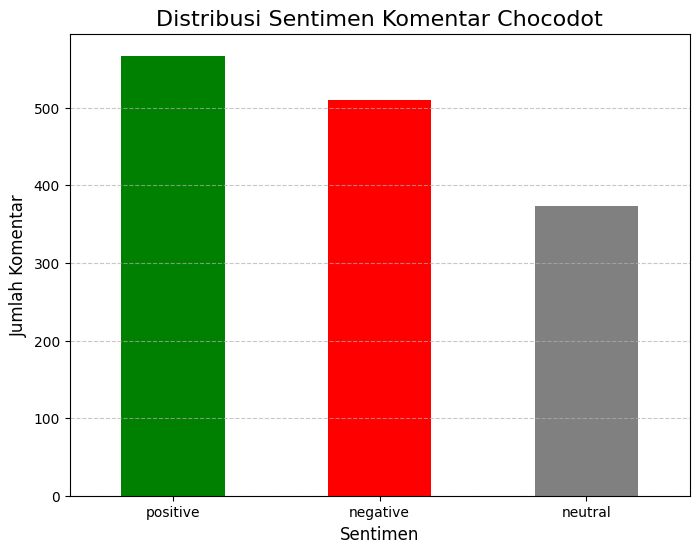

In [23]:
# Hitung jumlah setiap sentimen
sentiment_counts = df_chocodot['sentiment'].value_counts()
total_comments = len(df_chocodot)

# Hitung persentase untuk setiap sentimen
sentiment_percentages = (sentiment_counts / total_comments) * 100

print("--- Hasil Analisis Sentimen Chocodot ---")
print("\nJumlah Komentar per Sentimen:")
print(sentiment_counts)
print("\nPersentase Komentar per Sentimen:")
# Tampilkan dengan 2 angka di belakang koma
print(sentiment_percentages.round(2).astype(str) + '%')

# Tentukan warna
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

# Buat plot diagram balok
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=[colors.get(x, 'blue') for x in sentiment_counts.index])
plt.title('Distribusi Sentimen Komentar Chocodot', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

--- Analisis Platform untuk Chocodot ---
Kolom yang digunakan: 'platform'

Jumlah Komentar per Platform:
platform
youtube      534
tiktok       447
instagram    317
x            107
facebook      45
Name: count, dtype: int64

Persentase Komentar per Platform:
platform
youtube      36.83%
tiktok       30.83%
instagram    21.86%
x             7.38%
facebook       3.1%
Name: count, dtype: object


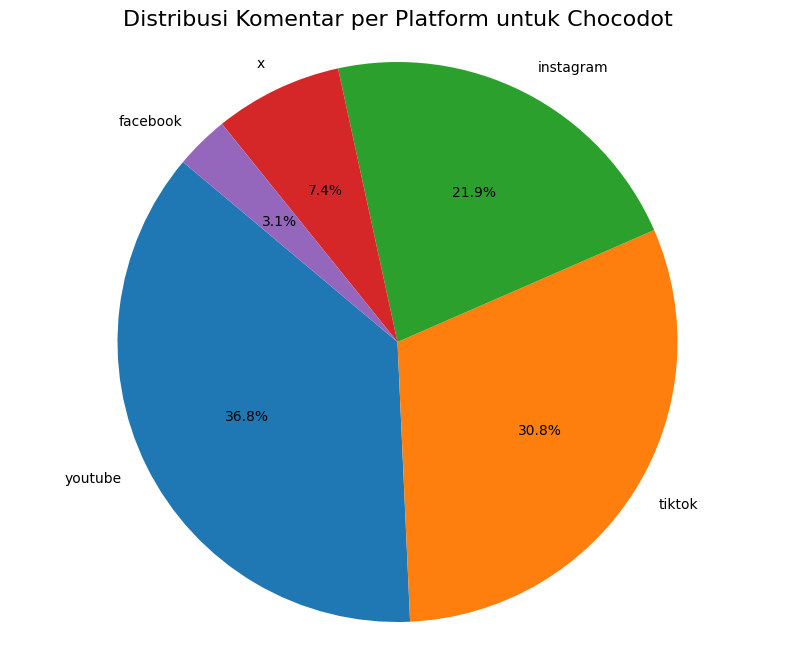

In [26]:
# --- PENTING: Tentukan nama kolom yang berisi platform ---
platform_column_chocodot = 'platform' # <--- Tambahkan baris ini

# Hitung jumlah komentar per platform
platform_counts = df_chocodot[platform_column_chocodot].value_counts()
total_comments_platform = platform_counts.sum()

# Hitung persentase platform
platform_percentages = (platform_counts / total_comments_platform) * 100

print(f"--- Analisis Platform untuk Chocodot ---")
print(f"Kolom yang digunakan: '{platform_column_chocodot}'")
print("\nJumlah Komentar per Platform:")
print(platform_counts)
print("\nPersentase Komentar per Platform:")
print(platform_percentages.round(2).astype(str) + '%')

# Buat plot diagram lingkaran (pie chart)
plt.figure(figsize=(10, 8))
plt.pie(platform_percentages, labels=platform_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Komentar per Platform untuk Chocodot', fontsize=16)
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk bulat sempurna
plt.show()

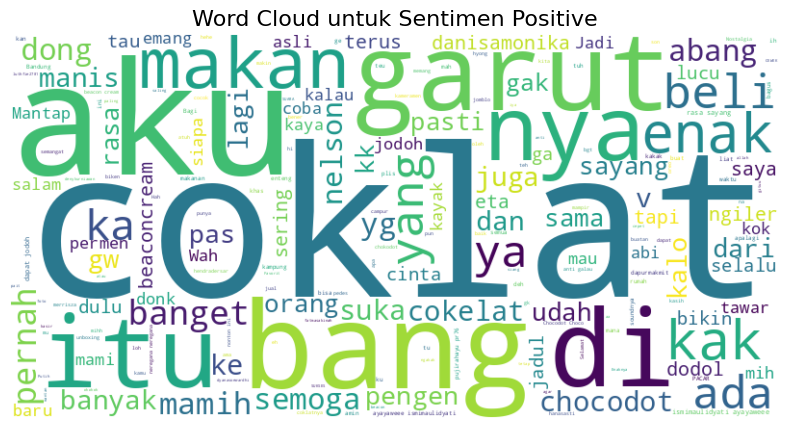

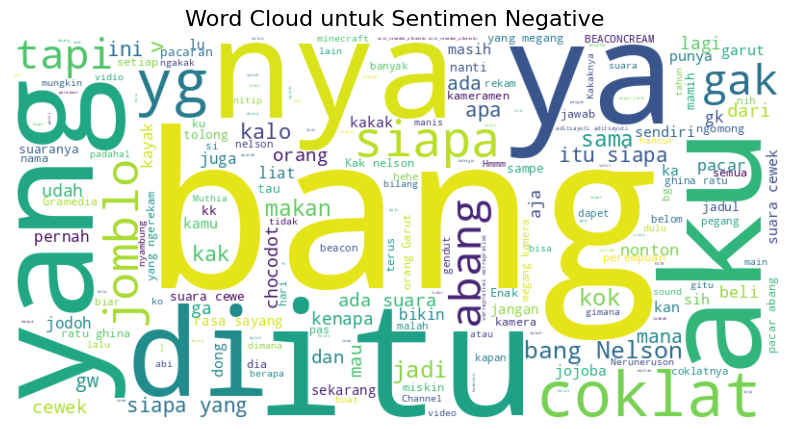

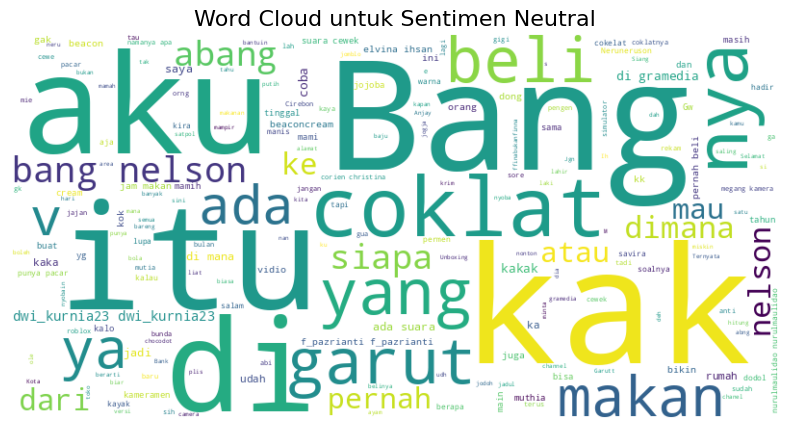

In [27]:
# Buat word cloud untuk setiap sentimen
generate_wordcloud('positive', df_chocodot, 'text')
generate_wordcloud('negative', df_chocodot, 'text')
generate_wordcloud('neutral', df_chocodot, 'text')